In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('json_og/barbell_dead_row_65906101_s05_13ang.csv')
df.head()

,Data,Frame,left_arm,right_arm,left_elbow,right_elbow,left_waist_leg,right_waist_leg,left_knee,right_kneee,leftup_chest_inside,rightup_chest_inside,leftlow_chest_inside,rightlow_chest_inside,leg_spread
0,"[{'X': 0.5437556505203247, 'Y': 0.260653793811...",0,16.967365,20.138432,169.483217,174.431905,171.884929,164.911296,178.278814,179.377459,84.921846,80.475747,89.705913,98.895454,33.049457
1,"[{'X': 0.5437383651733398, 'Y': 0.260431408882...",1,16.936865,20.042459,169.550945,174.445865,171.958123,164.523618,178.048408,178.356059,84.965892,80.538991,89.807621,99.215520,33.767571
2,"[{'X': 0.543701171875, 'Y': 0.2603459060192108...",2,16.893990,20.000677,169.536093,174.428564,172.033954,164.174630,177.901790,177.625834,85.017512,80.553714,89.832134,99.530506,34.271913
3,"[{'X': 0.5436867475509644, 'Y': 0.260182350873...",3,16.878244,19.917658,169.554811,174.474301,172.072884,164.028646,177.794069,177.370415,85.056615,80.575980,89.909441,99.621625,34.593849
4,"[{'X': 0.5436744689941406, 'Y': 0.260061174631...",4,16.868878,19.872644,169.541542,174.476371,172.091447,163.984656,177.616330,177.251948,85.067146,80.601857,89.924642,99.668258,34.747010


In [3]:
df.columns

Index(['Data', 'Frame', 'left_arm', 'right_arm', 'left_elbow', 'right_elbow',
       'left_waist_leg', 'right_waist_leg', 'left_knee', 'right_kneee',
       'leftup_chest_inside', 'rightup_chest_inside', 'leftlow_chest_inside',
       'rightlow_chest_inside', 'leg_spread'],
      dtype='object')

In [3]:
def lineplotdf(dataframe):
    """
    Plot a line chart using the first column as x-axis and the second column as y-axis.

    Parameters:
    - dataframe (pd.DataFrame): The input DataFrame.

    Returns:
    - None
    """
    if len(dataframe.columns) < 2:
        raise ValueError("DataFrame must have at least two columns.")

    x_column = dataframe.columns[0]
    y_column = dataframe.columns[1]

    plt.plot(dataframe[x_column], dataframe[y_column])
    plt.xlabel(x_column)
    plt.ylabel(y_column)
    plt.title(f'Line Chart: {y_column} vs {x_column}')
    plt.show()
    
def find_and_plot_deflection_points(df, threshold=0.05):
    # Assuming the DataFrame has two columns: 'Frame' and 'Smoothed_Y'
    x = df.iloc[:, 0]  # Assuming the first column is 'Frame'
    smoothed_y = df.iloc[:, 1]  # Assuming the second column is the smoothened y

    # Calculate the derivative (slope) of the smoothened y
    slope = np.gradient(smoothed_y, x)

    # Find indices where the slope exceeds the threshold
    deflection_indices = np.where(np.abs(slope) > threshold)[0]

    # Plot the original data and highlight deflection points
    plt.plot(x, smoothed_y, label='Smoothed Data')
    plt.scatter(x.iloc[deflection_indices], smoothed_y.iloc[deflection_indices], color='red', label='Deflection Points')
    
    # Adding labels and title
    plt.xlabel('Frame')
    plt.ylabel('Smoothed Y')
    plt.title('Deflection Points from Smoothened Data')
    
    # Adding legend
    plt.legend()
    
    # Display the plot
    plt.show()
    
def find_and_plot_apex_points_with_annotation(df, annotated_y_values):
    # Assuming the DataFrame has two columns: 'Frame' and 'Smoothed_Y'
    x = df.iloc[:, 0]  # Assuming the first column is 'Frame'
    smoothed_y = df.iloc[:, 1]  # Assuming the second column is the smoothened y

    # Calculate the first and second derivatives of the smoothened y
    first_derivative = np.gradient(smoothed_y, x)
    second_derivative = np.gradient(first_derivative, x)

    # Find indices where the second derivative changes sign
    apex_indices = np.where(np.diff(np.sign(second_derivative)))[0]

    # Plot the original data
    plt.plot(x, smoothed_y, label='Smoothed Data')

    # Display vertical lines at apex points
    for apex_index in apex_indices:
        plt.axvline(x=x.iloc[apex_index], color='red', linestyle='--', label='Apex Point')

    # Annotate y values at specified points
    for y_value in annotated_y_values:
        plt.axhline(y=y_value, color='green', linestyle='--', label=f'Annotated Y={y_value}')

    # Adding labels and title
    plt.xlabel('Frame')
    plt.ylabel('Smoothed Y')
    plt.title('Apex Points with Annotations from Smoothened Data')

    # Adding legend
    plt.legend()

    # Display the plot
    plt.show()

In [4]:
velo = df[['Frame','left_knee']]
velo

,Frame,left_knee
0,0,178.278814
1,1,178.048408
2,2,177.901790
3,3,177.794069
4,4,177.616330
...,...,...
896,896,177.337546
897,897,177.344001
898,898,177.310482
899,899,177.286525


In [6]:
velo.to_csv('velo_left_knee.csv', index=False)

<AxesSubplot: title={'center': 'Scatter Plot: Frame vs. left_knee'}, xlabel='Frame', ylabel='left_knee'>

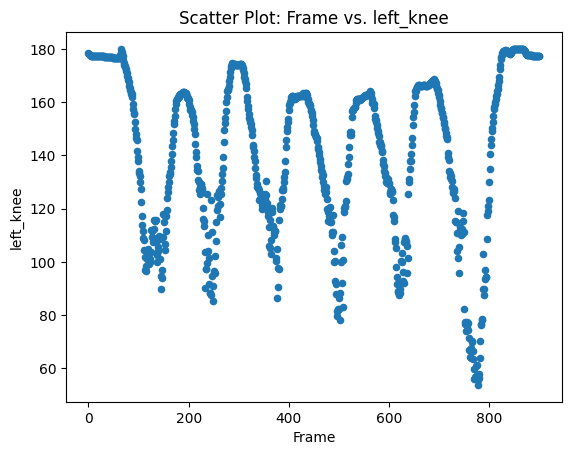

In [10]:
df.plot.scatter(x='Frame', y='left_knee', title='Scatter Plot: Frame vs. left_knee')

In [4]:
columns_to_smooth = [col for col in df.columns if col not in ['Data', 'Frame', 'Angular_Velocity', 'Angular_Acceleration']]

# Apply rolling mean with a window size of 50 to selected columns
df[columns_to_smooth] = df[columns_to_smooth].rolling(window=90, min_periods=1, axis=0).mean()

In [5]:
df[columns_to_smooth]

,left_arm,right_arm,left_elbow,right_elbow,left_waist_leg,right_waist_leg,left_knee,right_kneee,leftup_chest_inside,rightup_chest_inside,leftlow_chest_inside,rightlow_chest_inside,leg_spread
0,16.967365,20.138432,169.483217,174.431905,171.884929,164.911296,178.278814,179.377459,84.921846,80.475747,89.705913,98.895454,33.049457
1,16.952115,20.090446,169.517081,174.438885,171.921526,164.717457,178.163611,178.866759,84.943869,80.507369,89.756767,99.055487,33.408514
2,16.932740,20.060523,169.523419,174.435445,171.959002,164.536515,178.076338,178.453117,84.968417,80.522817,89.781890,99.213827,33.696314
3,16.919116,20.024807,169.531267,174.445159,171.987473,164.409548,178.005770,178.182442,84.990466,80.536108,89.813777,99.315776,33.920698
4,16.909068,19.994374,169.533322,174.451401,172.008268,164.324569,177.927882,177.996343,85.005802,80.549258,89.835950,99.386273,34.085960
...,...,...,...,...,...,...,...,...,...,...,...,...,...
896,22.099357,20.363896,171.060668,174.147965,163.436849,168.806849,175.889402,178.564029,77.587011,86.361859,94.306629,95.818850,35.514016
897,21.649186,20.532541,170.978049,174.295681,164.097144,168.815850,176.166816,178.614075,78.026607,86.029972,93.979703,95.892840,35.280155
898,21.215615,20.672892,170.895475,174.423207,164.714311,168.774360,176.417193,178.677636,78.444865,85.740160,93.682702,95.948105,35.066541
899,20.804651,20.799725,170.812111,174.538961,165.281416,168.701305,176.638682,178.742237,78.838686,85.480645,93.415969,95.995661,34.872548


In [27]:
df.head()

,Data,Frame,left_arm,right_arm,left_elbow,right_elbow,left_waist_leg,right_waist_leg,left_knee,right_kneee,leftup_chest_inside,rightup_chest_inside,leftlow_chest_inside,rightlow_chest_inside,leg_spread
0,"[{'X': 0.5437556505203247, 'Y': 0.260653793811...",0,16.967365,20.138432,169.483217,174.431905,171.884929,164.911296,178.278814,179.377459,84.921846,80.475747,89.705913,98.895454,33.049457
1,"[{'X': 0.5437383651733398, 'Y': 0.260431408882...",1,16.952115,20.090446,169.517081,174.438885,171.921526,164.717457,178.163611,178.866759,84.943869,80.507369,89.756767,99.055487,33.408514
2,"[{'X': 0.543701171875, 'Y': 0.2603459060192108...",2,16.932740,20.060523,169.523419,174.435445,171.959002,164.536515,178.076338,178.453117,84.968417,80.522817,89.781890,99.213827,33.696314
3,"[{'X': 0.5436867475509644, 'Y': 0.260182350873...",3,16.919116,20.024807,169.531267,174.445159,171.987473,164.409548,178.005770,178.182442,84.990466,80.536108,89.813777,99.315776,33.920698
4,"[{'X': 0.5436744689941406, 'Y': 0.260061174631...",4,16.909068,19.994374,169.533322,174.451401,172.008268,164.324569,177.927882,177.996343,85.005802,80.549258,89.835950,99.386273,34.085960


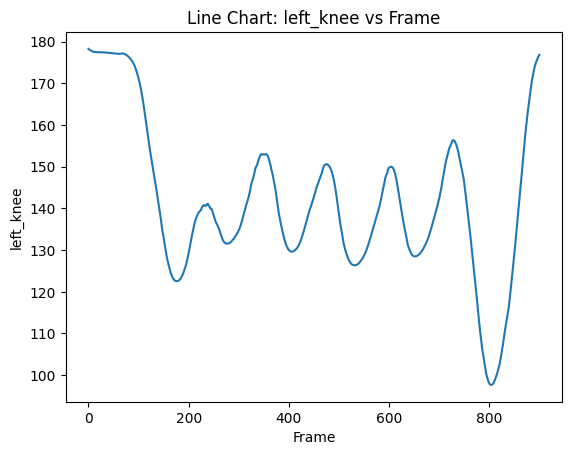

In [12]:
lineplotdf(df[['Frame','left_knee']])

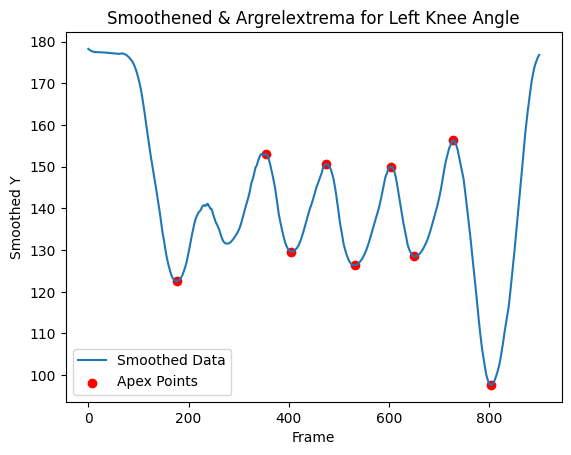

In [13]:
import pandas as pd
import numpy as np
from scipy.signal import argrelextrema
import matplotlib.pyplot as plt

def find_and_plot_apex_points(df, window_size=100):
    # Assuming the DataFrame has two columns: 'Frame' and 'Smoothed_Y'
    x = df.iloc[:, 0]  # Assuming the first column is 'Frame'
    smoothed_y = df.iloc[:, 1]  # Assuming the second column is the smoothened y

    # Find relative maxima (peaks) within a window of 100 frames
    peaks_indices = argrelextrema(smoothed_y.values, np.greater, order=window_size)[0]

    # Find relative minima (valleys) within a window of 100 frames
    valleys_indices = argrelextrema(smoothed_y.values, np.less, order=window_size)[0]

    # Combine peaks and valleys indices
    apex_indices = np.sort(np.concatenate([peaks_indices, valleys_indices]))

    # Plot the original data and highlight apex points
    plt.plot(x, smoothed_y, label='Smoothed Data')
    plt.scatter(x.iloc[apex_indices], smoothed_y.iloc[apex_indices], color='red', label='Apex Points')

    # Adding labels and title
    plt.xlabel('Frame')
    plt.ylabel('Smoothed Y')
    plt.title('Smoothened & Argrelextrema for Left Knee Angle')

    # Adding legend
    plt.legend()

    # Display the plot
    plt.show()
    return apex_indices

# Example usage with a DataFrame 'df'
# Assuming 'df' has columns 'Frame' and 'left_arm_smoothed' (replace with your actual column names)
indices = find_and_plot_apex_points(df[['Frame', 'left_knee']])

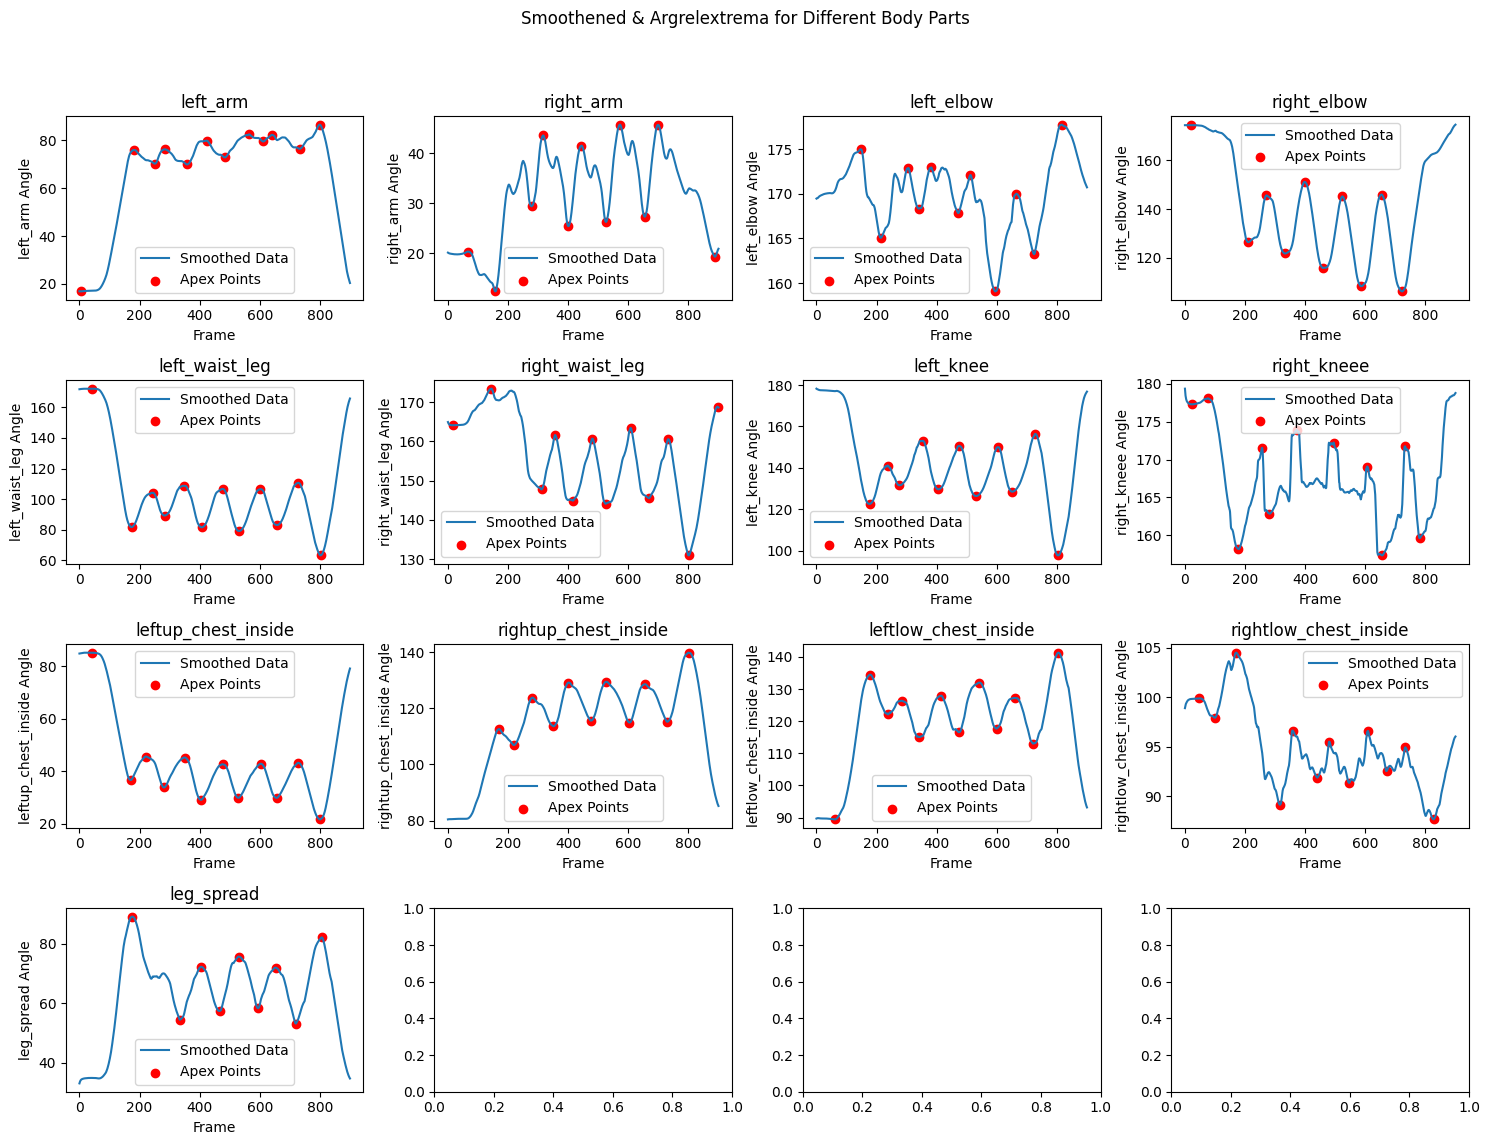

In [14]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.signal import argrelextrema
   
def find_and_plot_apex_points_for_columns(df, window_size=100, method=1):
    columns = df.columns[1:]  # Exclude the first column assuming it's 'Frame'

    num_columns = len(columns)
    num_rows = (num_columns - 1) // 4 + 1  # Ensure there are at most 4 graphs per row

    # Create a subplot grid based on the number of columns
    fig, axs = plt.subplots(num_rows, min(4, num_columns), figsize=(15, 3 * num_rows))
    fig.suptitle('Smoothened & Argrelextrema for Different Body Parts')
    
    angle_peaks = []
    
    for i, col in enumerate(columns):
        # Get the x and y data for the current column
        x = df.iloc[:, 0]  # Assuming the first column is 'Frame'
        y = df[col]

        # Find relative maxima (peaks) within a window of 100 frames
        peaks_indices = argrelextrema(y.values, np.greater, order=window_size)[0]

        # Find relative minima (valleys) within a window of 100 frames
        valleys_indices = argrelextrema(y.values, np.less, order=window_size)[0]

        # Combine peaks and valleys indices
        apex_indices = np.sort(np.concatenate([peaks_indices, valleys_indices]))
        
        # Add to angle peaks
        angle_peaks.append({'column':df.columns[i + 1], 'indices':apex_indices})
        
        # Determine the subplot location based on the current index
        row, col = divmod(i, min(4, num_columns))

        if method == 1:
            # Plot the original data and highlight apex points with y-axis limited to 0-180
            axs[row, col].plot(x, y, label='Smoothed Data')
            axs[row, col].scatter(x.iloc[apex_indices], y.iloc[apex_indices], color='red', label='Apex Points')
            axs[row, col].set_ylim(0, 180)  # Limit y-axis to 0-180 degrees
        elif method == 2:
            # Plot the original data and highlight apex points without limiting y-axis
            axs[row, col].plot(x, y, label='Smoothed Data')
            axs[row, col].scatter(x.iloc[apex_indices], y.iloc[apex_indices], color='red', label='Apex Points')

        # Adding labels and title for the current subplot
        axs[row, col].set_xlabel('Frame')
        axs[row, col].set_ylabel(f'{df.columns[i + 1]} Angle')
        axs[row, col].set_title(f'{df.columns[i + 1]}')
        axs[row, col].legend()

    # Adjust layout for better spacing
    plt.tight_layout(rect=[0, 0.03, 1, 0.95])

    # Display the plot
    plt.show()
    
    return angle_peaks


angle_peaks = find_and_plot_apex_points_for_columns(df[['Frame', 'left_arm', 'right_arm', 'left_elbow', 'right_elbow',
                                           'left_waist_leg', 'right_waist_leg', 'left_knee', 'right_kneee',
                                           'leftup_chest_inside', 'rightup_chest_inside', 'leftlow_chest_inside',
                                           'rightlow_chest_inside', 'leg_spread']], window_size=70, method=2)


In [ ]:
a

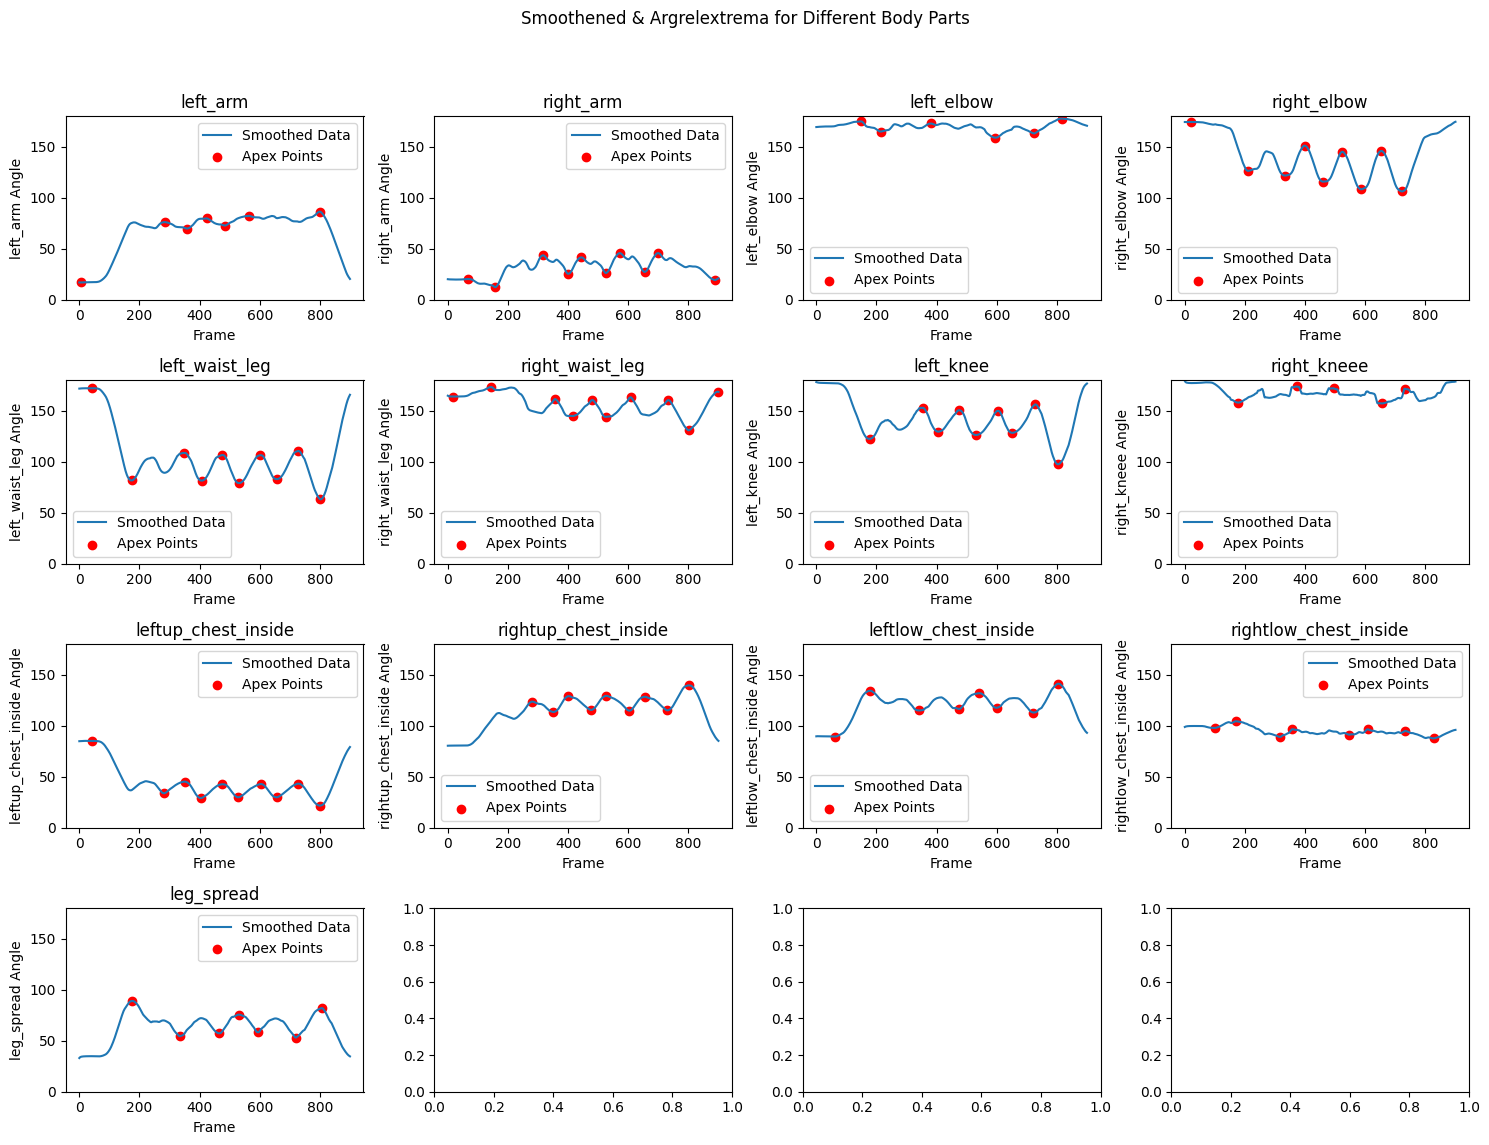

In [15]:
angle_peaks = find_and_plot_apex_points_for_columns(df[['Frame', 'left_arm', 'right_arm', 'left_elbow', 'right_elbow',
                                           'left_waist_leg', 'right_waist_leg', 'left_knee', 'right_kneee',
                                           'leftup_chest_inside', 'rightup_chest_inside', 'leftlow_chest_inside',
                                           'rightlow_chest_inside', 'leg_spread']], window_size=100, method=1)


In [26]:
angle_peaks

[{'column': 'left_arm',
  'indices': array([  4, 284, 358, 423, 484, 564, 799], dtype=int64)},
 {'column': 'right_arm',
  'indices': array([ 66, 158, 317, 401, 444, 526, 572, 655, 699, 888], dtype=int64)},
 {'column': 'left_elbow',
  'indices': array([147, 214, 382, 595, 724, 816], dtype=int64)},
 {'column': 'right_elbow',
  'indices': array([ 20, 211, 332, 398, 460, 524, 585, 654, 723], dtype=int64)},
 {'column': 'left_waist_leg',
  'indices': array([ 42, 174, 347, 407, 476, 532, 602, 658, 728, 802], dtype=int64)},
 {'column': 'right_waist_leg',
  'indices': array([ 16, 144, 357, 415, 480, 525, 608, 733, 801, 897], dtype=int64)},
 {'column': 'left_knee',
  'indices': array([177, 354, 405, 475, 532, 604, 651, 728, 804], dtype=int64)},
 {'column': 'right_kneee',
  'indices': array([178, 372, 495, 656, 732], dtype=int64)},
 {'column': 'leftup_chest_inside',
  'indices': array([ 43, 281, 351, 404, 476, 529, 603, 657, 728, 800], dtype=int64)},
 {'column': 'rightup_chest_inside',
  'indices

In [17]:
import math

def getRepAverage(angle_peaks):
    reps_total = 0
    reps_count = 0
    reps_avg = 0

    for peak in angle_peaks:
        rep = int(len(peak['indices'])/2)
        reps_total += rep
        reps_count +=1
    
    return math.ceil(reps_total/reps_count)

print(getRepAverage(angle_peaks))

4


# Major - leg, knee

In [18]:
# Assuming we have a model 'major' 
def filter_columns_by_keywords(data, keywords):
    filtered_columns = [item for item in data if any(keyword in item['column'] for keyword in keywords)]
    return filtered_columns

major = 'leg' # other possible - arms, upper
leg_ex = filter_columns_by_keywords(angle_peaks, ['leg','knee'])
leg_ex

[{'column': 'left_waist_leg',
  'indices': array([ 42, 174, 347, 407, 476, 532, 602, 658, 728, 802], dtype=int64)},
 {'column': 'right_waist_leg',
  'indices': array([ 16, 144, 357, 415, 480, 525, 608, 733, 801, 897], dtype=int64)},
 {'column': 'left_knee',
  'indices': array([177, 354, 405, 475, 532, 604, 651, 728, 804], dtype=int64)},
 {'column': 'right_kneee',
  'indices': array([178, 372, 495, 656, 732], dtype=int64)},
 {'column': 'leg_spread',
  'indices': array([176, 334, 466, 530, 594, 720, 806], dtype=int64)}]

In [19]:
# get average of this

input_reps = getRepAverage(leg_ex)

In [20]:
def calculate_interval_differences(data):
    result = []
    
    for item in data:
        column_name = item['column']
        indices = item['indices']
        
        # Calculate differences between alternate frame numbers
        interval_differences = [indices[i + 2] - indices[i] for i in range(0, len(indices) - 2, 2)]
        
        result.append({'column': column_name, 'interval_differences': interval_differences})
    
    return result

def calculate_average_interval(data):
    result = []

    for item in data:
        column_name = item['column']
        interval_differences = item['interval_differences']

        # Calculate average of interval differences
        average_difference = sum(interval_differences) / len(interval_differences)

        result.append({'column': column_name, 'average_difference': average_difference})

    return result

def calculate_overall_average_difference(data):
    all_differences = []

    for item in data:
        all_differences.extend(item['interval_differences'])

    overall_average_difference = sum(all_differences) / len(all_differences)

    return overall_average_difference

In [21]:
# individual average:

intervals = calculate_interval_differences(leg_ex)
avg_intervals = calculate_average_interval(intervals)
avg_intervals

[{'column': 'left_waist_leg', 'average_difference': 171.5},
 {'column': 'right_waist_leg', 'average_difference': 196.25},
 {'column': 'left_knee', 'average_difference': 156.75},
 {'column': 'right_kneee', 'average_difference': 277.0},
 {'column': 'leg_spread', 'average_difference': 210.0}]

In [22]:
# overal rep-length
overall = calculate_overall_average_difference(intervals)
print(overall,'frames per rep\n', 'Avg. Rep Duration:',(overall/50),'s')

193.05882352941177 frames per rep
 Avg. Rep Duration: 3.8611764705882354 s


# Note: from these smooth plots we can derive the type of the exercise [leg, arms, full_body]

In [23]:
apex_indices = indices
apex_indices
# [68, 267, 447, 637, 821, 1011]

array([177, 354, 405, 475, 532, 604, 651, 728, 804], dtype=int64)

In [25]:
import cv2
import numpy as np

# Open the video file (replace 'your_video.mp4' with the actual file path)
video_path = 'videos/barbell_dead_row_65906101_s05.mp4'
cap = cv2.VideoCapture(video_path)

# Check if the video file is opened successfully
if not cap.isOpened():
    print("Error: Unable to open the video file.")
    exit()

fps=1 # not 50 

# Read and display frames corresponding to apex indices
for apex_index in apex_indices:
    # Set the frame position based on the apex index and frame rate
    frame_position = int(apex_index * fps)
    cap.set(cv2.CAP_PROP_POS_FRAMES, frame_position)

    # Read the frame
    ret, frame = cap.read()

    # Check if the frame is read successfully
    if not ret:
        print(f"Error: Unable to read frame at index {apex_index}")
        break

    # Display the frame number on the top-left corner
    font = cv2.FONT_HERSHEY_SIMPLEX
    font_scale = 0.8
    font_thickness = 2
    text_color = (255, 255, 255)
    cv2.putText(frame, f'Frame: {frame_position}', (10, 30), font, font_scale, text_color, font_thickness)
    cv2.putText(frame, f'Timestamp: {frame_position/50}', (10, 80), font, font_scale, text_color, font_thickness)

    # Display the frame
    cv2.imshow('Frame', frame)
    cv2.waitKey(0)  # Wait for a key press to show the next frame

# Release the video capture object
cap.release()

# Close all OpenCV windows
cv2.destroyAllWindows()
